# Assignment-7

This notebook contains the questions to test the proficiency in `Exploratory Data Analysis`.

### Date: 28th June, 2025

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the assignment and save it.
- Rename the file as `Assignment-07-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-07-Dipika_Chopra.ipynb`.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/1lziCZ4VgEyOvI_kAngLMVlls0S-cugZE?usp=drive_link
<h3><span style="color:red"> Deadline: 26th July, 2025 </span></h3>

### Problem Statement:

The banking churn prediction dataset (uploaded in the same folder) contains different attributes of the customers of the bank and whether they have churned or not.
Churning means closing the relationship with the bank. Following are the descriptions of the columns in the dataset.

- customer_id: Unique identifier for each customer.
- vintage: The duration of the customer's relationship with the company.
- age: Age of the customer.
- gender: Gender of the customer.
- dependents: Number of dependents the customer has.
- occupation: The occupation of the customer.
- city: City in which the customer is located.
- customer_nw_category: Net worth category of the customer.
- branch_code: Code identifying the branch associated with the customer.
- current_balance: Current balance in the customer's account.
- previous_month_end_balance: Account balance at the end of the previous month.
- average_monthly_balance_prevQ: Average monthly balance in the previous quarter.
- average_monthly_balance_prevQ2: Average monthly balance in the second previous quarter.
- current_month_credit: Credit amount in the current month.
- previous_month_credit: Credit amount in the previous month.
- current_month_debit: Debit amount in the current month.
- previous_month_debit: Debit amount in the previous month.
- current_month_balance: Account balance in the current month.
- previous_month_balance: Account balance in the previous month.
- churn: The target variable indicating whether the customer has churned (1 for churned, 0 for not churned).
- last_transaction: Timestamp of the customer's last transaction.


Your task is to perform exploratory data analysis (EDA) on Banking Churn Prediction dataset. 

### Load Data

In [408]:
# Load libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [409]:
df = pd.read_csv("./Banking_churn_prediction.csv")

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [411]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


### Missing Values Treatment

In [412]:
df.isnull().sum().sort_values(ascending=False)

dependents                        2463
city                               803
gender                             525
occupation                          80
customer_id                          0
current_month_credit                 0
churn                                0
previous_month_balance               0
current_month_balance                0
previous_month_debit                 0
current_month_debit                  0
previous_month_credit                0
previous_month_end_balance           0
average_monthly_balance_prevQ2       0
average_monthly_balance_prevQ        0
vintage                              0
current_balance                      0
branch_code                          0
customer_nw_category                 0
age                                  0
last_transaction                     0
dtype: int64

In [413]:
# Fill categorical with NA
df['gender'] = df['gender'].fillna('NA')
df['occupation'] = df['occupation'].fillna('NA')

# Fill numeric with 0
df['city'] = df['city'] = df['city'].fillna(0)
df['dependents'].fillna(0, inplace=True)

In [414]:
df.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

### DataTypes Conversion

In [415]:
# integer
df['dependents'] = df['dependents'].astype('int64')

In [416]:
# categorical
df['branch_code'] = df['branch_code'].astype('category')
df['city'] = df['city'].astype('int64').astype('category')
df['gender'] = df['gender'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['customer_nw_category'] = df['customer_nw_category'].astype('category')

In [417]:
# boolean
df['churn_bool'] = df['churn'].map({0: "No", 1: "Yes"}).astype('category')

In [418]:
# drop customer_id
df.drop(['customer_id'], axis=1, inplace=True)

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         28382 non-null  int64   
 1   age                             28382 non-null  int64   
 2   gender                          28382 non-null  category
 3   dependents                      28382 non-null  int64   
 4   occupation                      28382 non-null  category
 5   city                            28382 non-null  category
 6   customer_nw_category            28382 non-null  category
 7   branch_code                     28382 non-null  category
 8   current_balance                 28382 non-null  float64 
 9   previous_month_end_balance      28382 non-null  float64 
 10  average_monthly_balance_prevQ   28382 non-null  float64 
 11  average_monthly_balance_prevQ2  28382 non-null  float64 
 12  current_month_cred

In [420]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,churn_bool
0,2101,66,Male,0,self_employed,187,2,755,1458.71,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21,No
1,2348,35,Male,0,self_employed,0,2,3214,5390.37,8704.66,...,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01,No
2,2194,31,Male,0,salaried,146,2,41,3913.16,5815.29,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,No
3,2329,90,NA,0,self_employed,1020,2,582,2291.91,2291.91,...,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06,Yes
4,1579,42,Male,2,self_employed,1494,3,388,927.72,1401.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03,Yes


In [421]:
df.describe().round(0)

,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.0,28382.0,28382.0,28382.0,28382.0,28382.0,28382.0,28382.0,28382.0,28382.0,28382.0,28382.0,28382.0,28382.0
mean,2091.0,48.0,0.0,7381.0,7496.0,7497.0,7124.0,3433.0,3262.0,3659.0,3340.0,7451.0,7495.0,0.0
std,273.0,18.0,1.0,42599.0,42529.0,41726.0,44576.0,77071.0,29689.0,51985.0,24301.0,42034.0,42432.0,0.0
min,73.0,1.0,0.0,-5504.0,-3150.0,1429.0,-16506.0,0.0,0.0,0.0,0.0,-3374.0,-5172.0,0.0
25%,1958.0,36.0,0.0,1784.0,1906.0,2181.0,1833.0,0.0,0.0,0.0,0.0,1997.0,2074.0,0.0
50%,2154.0,46.0,0.0,3281.0,3380.0,3543.0,3360.0,1.0,1.0,92.0,110.0,3448.0,3465.0,0.0
75%,2292.0,60.0,0.0,6636.0,6657.0,6667.0,6518.0,707.0,749.0,1360.0,1358.0,6668.0,6655.0,0.0
max,2476.0,90.0,52.0,5905904.0,5740439.0,5700290.0,5010170.0,12269845.0,2361808.0,7637857.0,1414168.0,5778185.0,5720144.0,1.0


### Univariate Analysis

In [422]:
num_cols = df.select_dtypes(include=[np.int64]).columns
balance_cols = df.select_dtypes(include=[np.float64]).columns

##### Histogram Plots (Numeric)

In [423]:
def histogram_chart(col, bins=20):

    df_col = df[col] # slice the df to selected column

    fig, ax = plt.subplots(1, 1, figsize=(6,4))

    if col in balance_cols:
        df_col = df_col[df_col > 0] #log-transform works on +ve values
        sns.histplot(np.log10(df_col), bins=bins, ax=ax) #apply log-transform
        ax.set_title(f"Log10 Histogram of {col}")
        ax.set_xlabel(f"Log10({col})")
    else: 
        sns.histplot(df_col, bins=bins, ax=ax)
        ax.set_title(f"Histogram of {col}")
        ax.set_xlabel(col)

    ax.set_ylabel("Count")
    plt.tight_layout()
    plt.show()

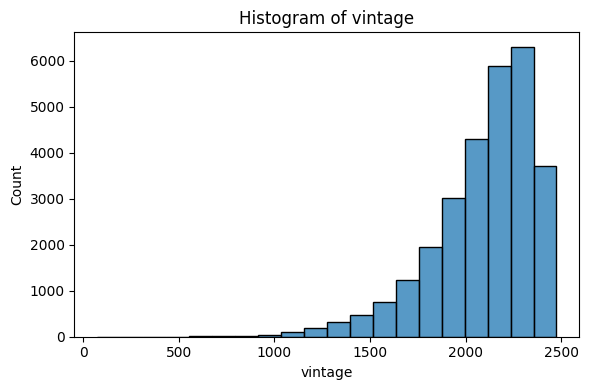

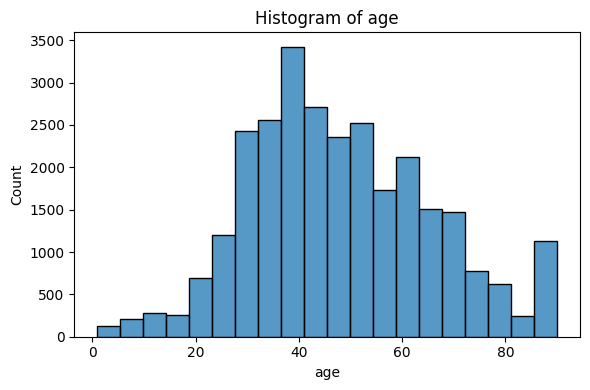

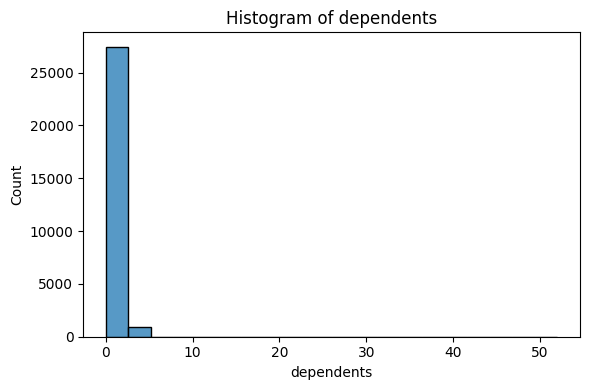

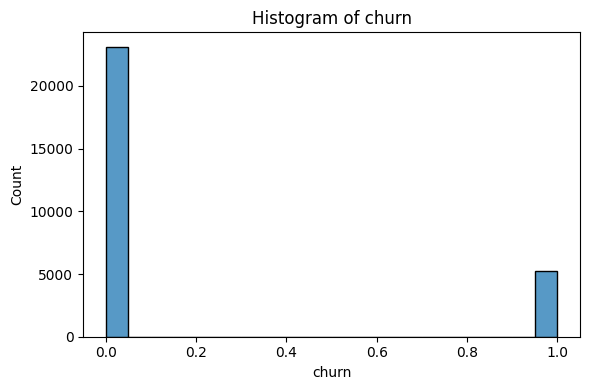

In [424]:
# histogram of numeric columns (except balance)

for col in num_cols:
    histogram_chart(col)

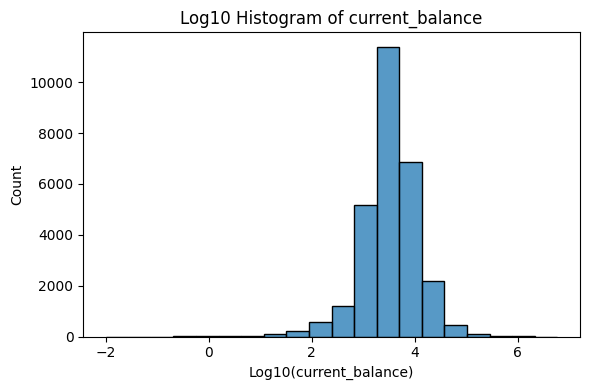

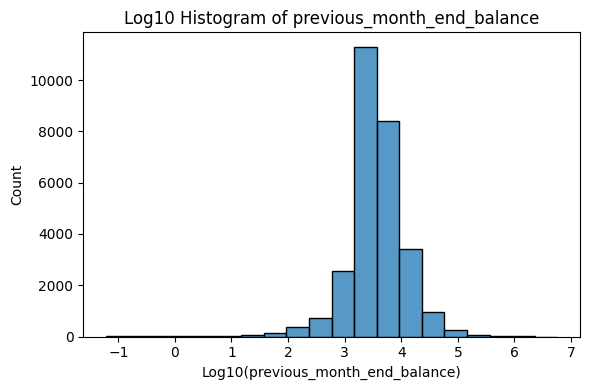

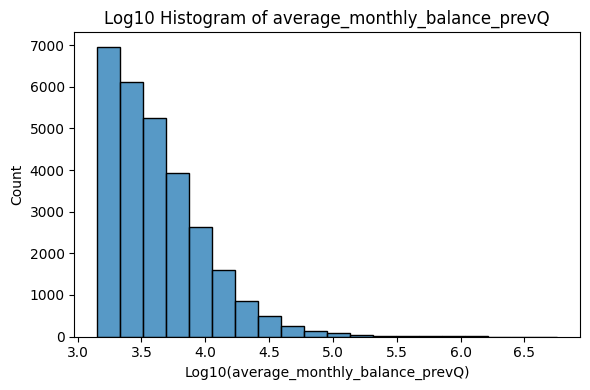

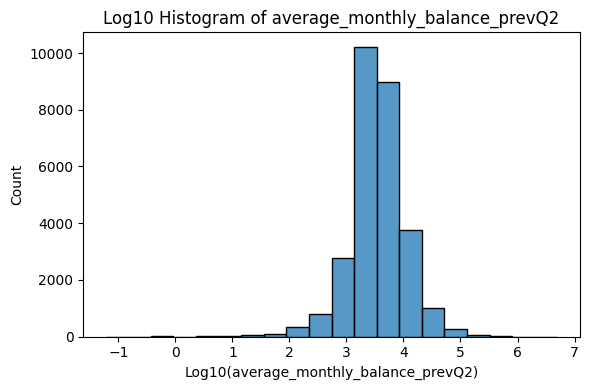

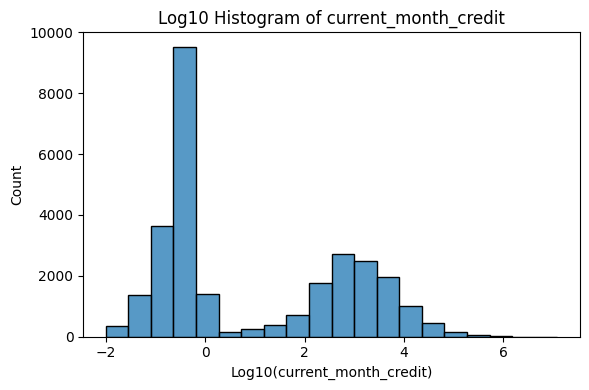

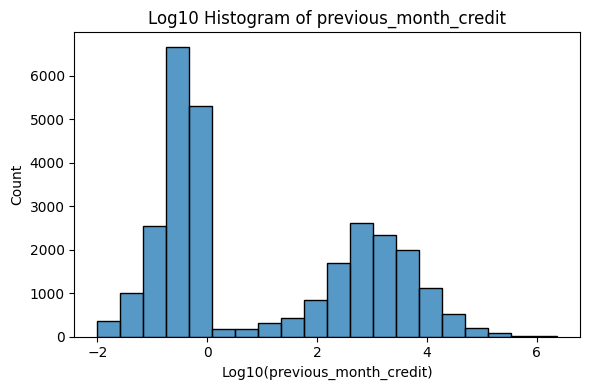

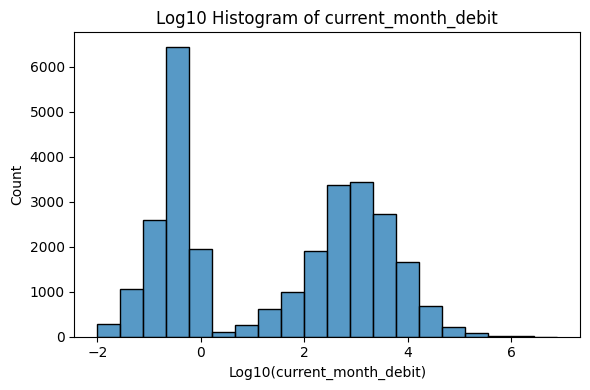

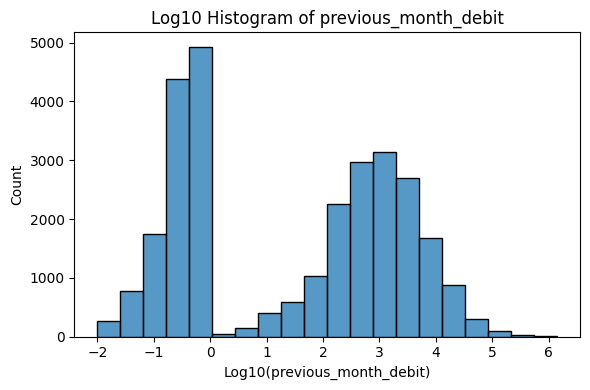

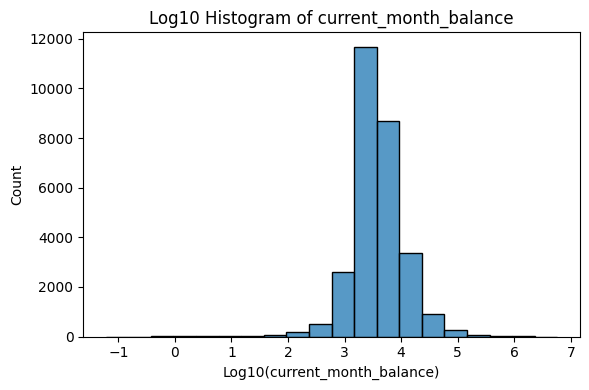

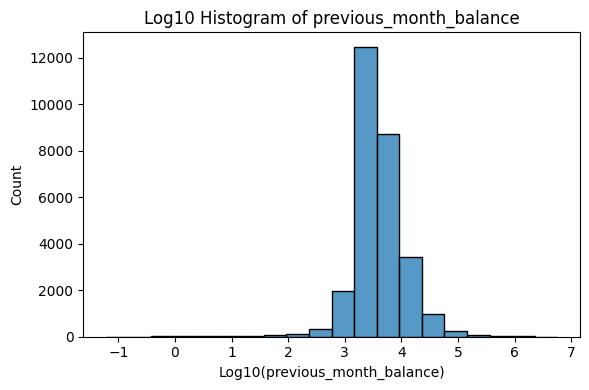

In [318]:
# log histogram of balance columns

for col in balance_cols:
    histogram_chart(col)

**Insights:**
1. current balance and previous_month_balance are normally distributed when log-transform is applied
2. credits and debits have -ve log in distribution, which means a lot of credit and debit values are small falling between 0 and 1. *for eg. log10(0.1) = −1 because 10⁻¹ = 0.1*

##### Box Plots (Numeric)

In [425]:
def boxplot_chart(col):
    
    fig, ax = plt.subplots(1, 1, figsize=(6,3))
    df_col = df[col]

    if col in balance_cols:
        df_col = df_col[df_col > 0]
        sns.boxplot(x=np.log10(df_col), ax=ax)
        ax.set_title(f"Log10 Boxplot of {col}")
        ax.set_xlabel(f"Log10({col})")
    else:
        sns.boxplot(x=df_col, ax=ax)
        ax.set_title(f"Boxplot of {col}")
        ax.set_xlabel(col)

    plt.tight_layout()
    plt.show()

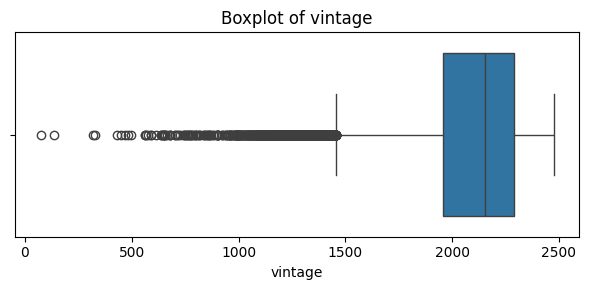

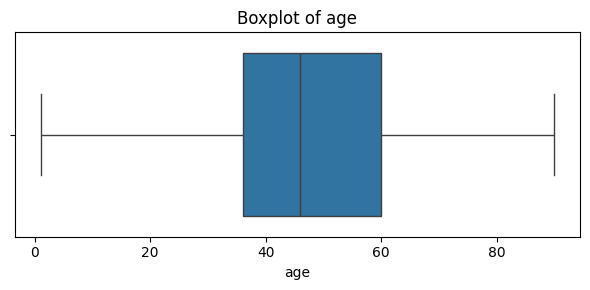

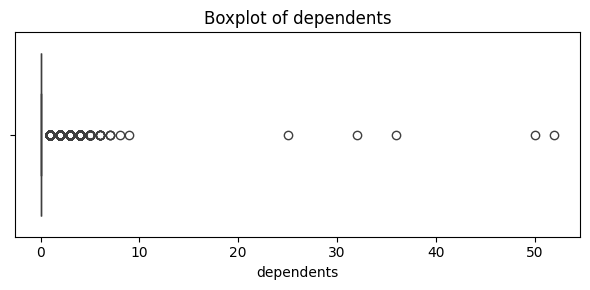

In [427]:
for col in num_cols:
    if col == 'churn':
        continue
    else:
        boxplot_chart(col)

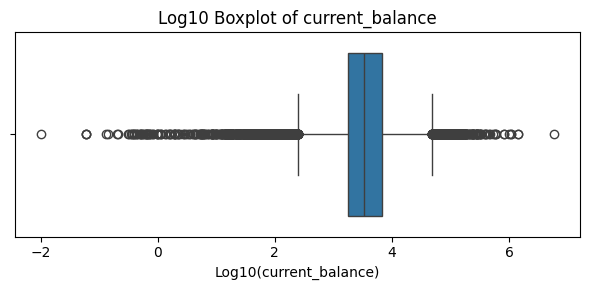

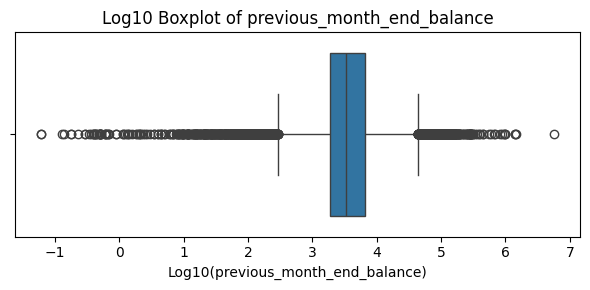

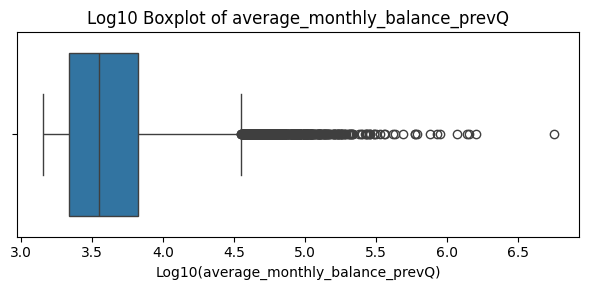

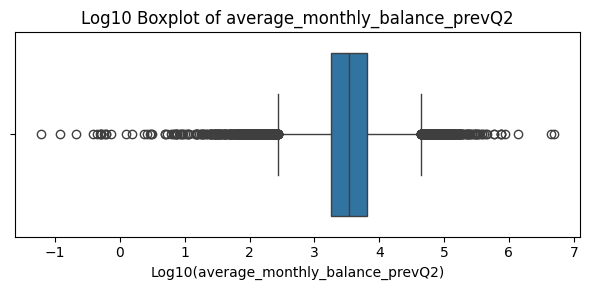

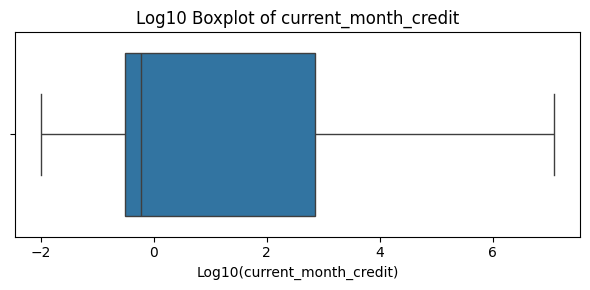

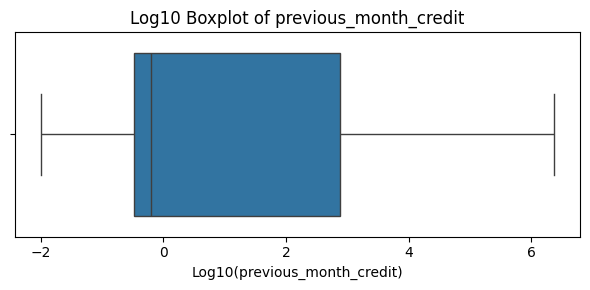

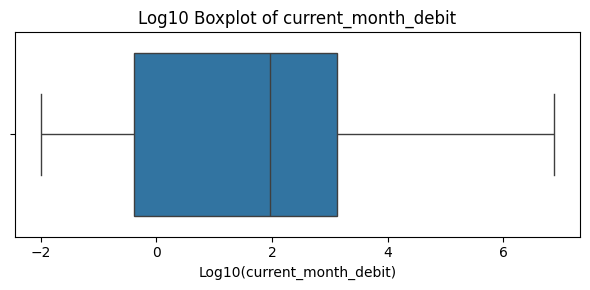

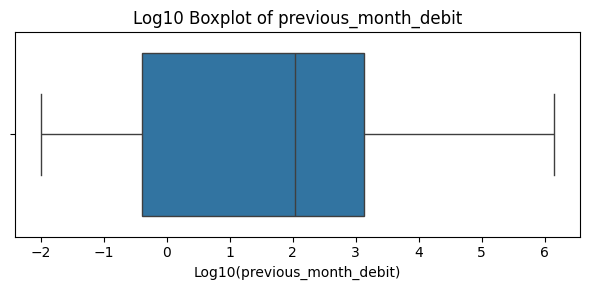

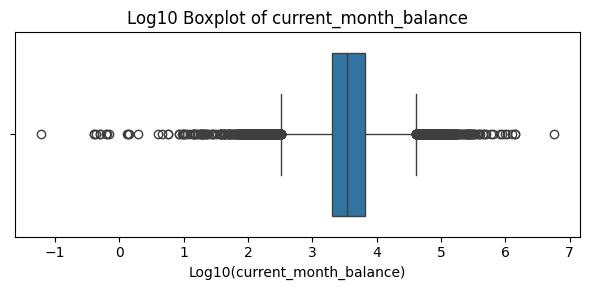

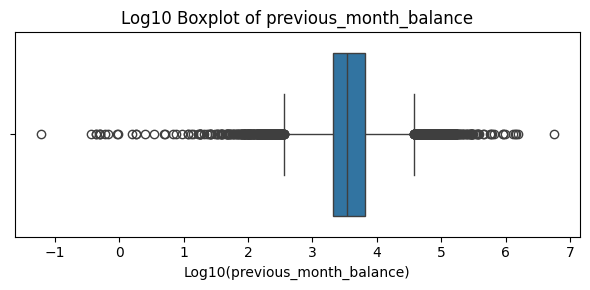

In [428]:
# log box-plots of balance columns

for col in balance_cols:
    boxplot_chart(col)

**Insights:**
1. Vintage is left-skewed, few customers are recent, while lot of them are long-tenured.
2. Current Month Balance, Right-whisker outliers are high-net-worth customers with very large balances, Whereas, Left-whisker outliers are low-balance or overdraft customers with low or negative balances.

##### Bar Plots (Categorical)

In [429]:
cat_cols = ['gender', 'occupation', 'customer_nw_category']

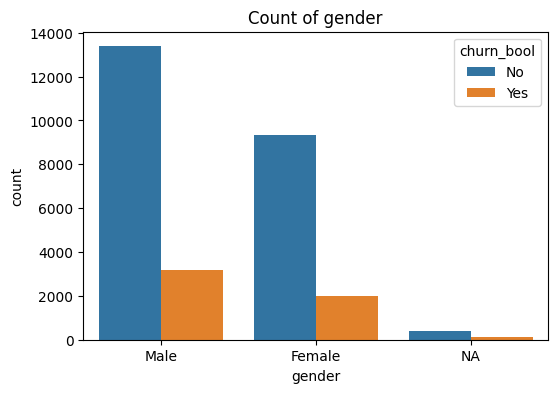

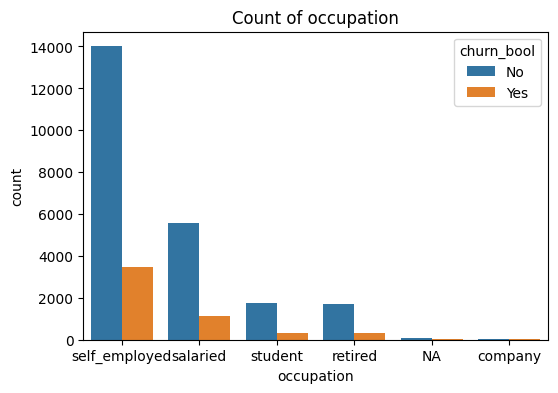

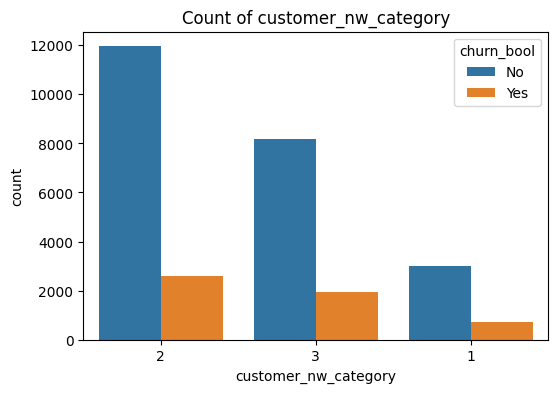

In [430]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, hue=df['churn_bool'])
    plt.title(f"Count of {col}")
    plt.show()


### Bivariate Analysis

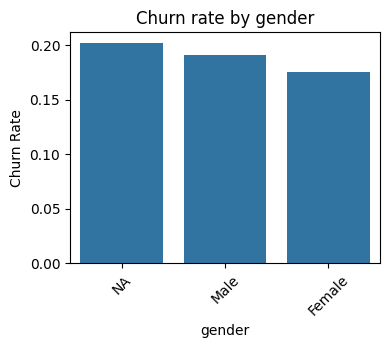

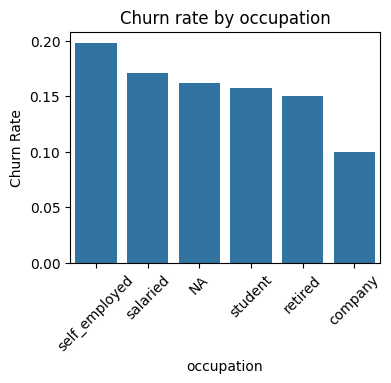

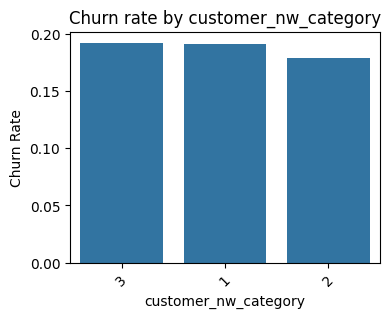

In [431]:
# bar-chart of churn rate broken down by gender, occupation, nw_category

for col in cat_cols:
    order = df.groupby(col)['churn'].mean().sort_values(ascending=False).index
    plt.figure(figsize=(4,3))
    sns.barplot(x=col, y="churn", data=df, order=order, errorbar=None)
    plt.title(f"Churn rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=45) 
    plt.show()

**Insight:** Self Employed and Catgeory = 3 have the highest churn rate

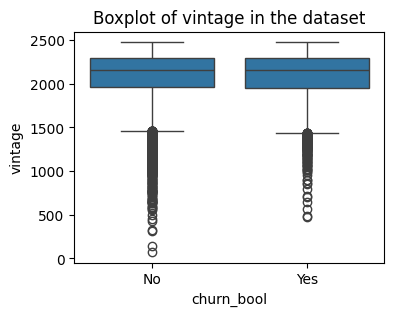

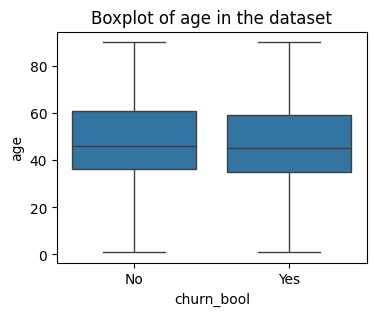

In [432]:
cols = ['vintage', 'age']

for col in cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df["churn_bool"], y=df[col])
    plt.title(f"Boxplot of {col} in the dataset")
    plt.show()

**Insights:** No difference in age and vintage between churn and not churn customers

In [433]:
df['vintage'].quantile([0.05, 0.25, 0.50, 0.75, 0.95])

0.05    1558.0
0.25    1958.0
0.50    2154.0
0.75    2292.0
0.95    2408.0
Name: vintage, dtype: float64

In [434]:
df['age'].quantile([0.05, 0.25, 0.50, 0.75, 0.95])

0.05    23.0
0.25    36.0
0.50    46.0
0.75    60.0
0.95    81.0
Name: age, dtype: float64

In [435]:
# create bins for age and vintage at p5, p25, etc
df['vintage_bin'] = pd.qcut(df['vintage'], q=[0, .05, .25, .50, .75, .95, 1.0], labels=['≤5%', '5–25%', '25–50%', '50–75%', '75–95%', '>95%'], 
                            duplicates='drop')  # if some quantiles are equal

df['age_bin'] = pd.qcut(df['age'], q=[0, .05, .25, .50, .75, .95, 1.0], labels=['≤5%', '5–25%', '25–50%', '50–75%', '75–95%', '>95%'], 
                            duplicates='drop')  # if some quantiles are equal

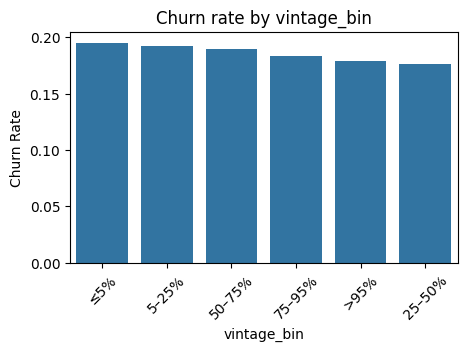

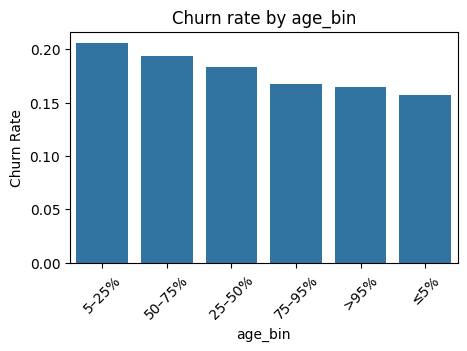

In [436]:
bin_cols = ['vintage_bin', 'age_bin']

for col in bin_cols:
    order = df.groupby(col)['churn'].mean().sort_values(ascending=False).index
    plt.figure(figsize=(5,3))
    sns.barplot(x=col, y="churn", data=df, order=order, errorbar=None)
    plt.title(f"Churn rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=45) 
    plt.show()

**Insights:**
1. Lowest (< 5 percentile) vintage (1500 days) has the highest churn rate
2. Lowest (< 5 percentile) customer's age (<23 yrs) with has the lowest churn rate, age (>23 and <36 yrs) has the highest churn rate

##### Correlation Matrix (Balance Columns)

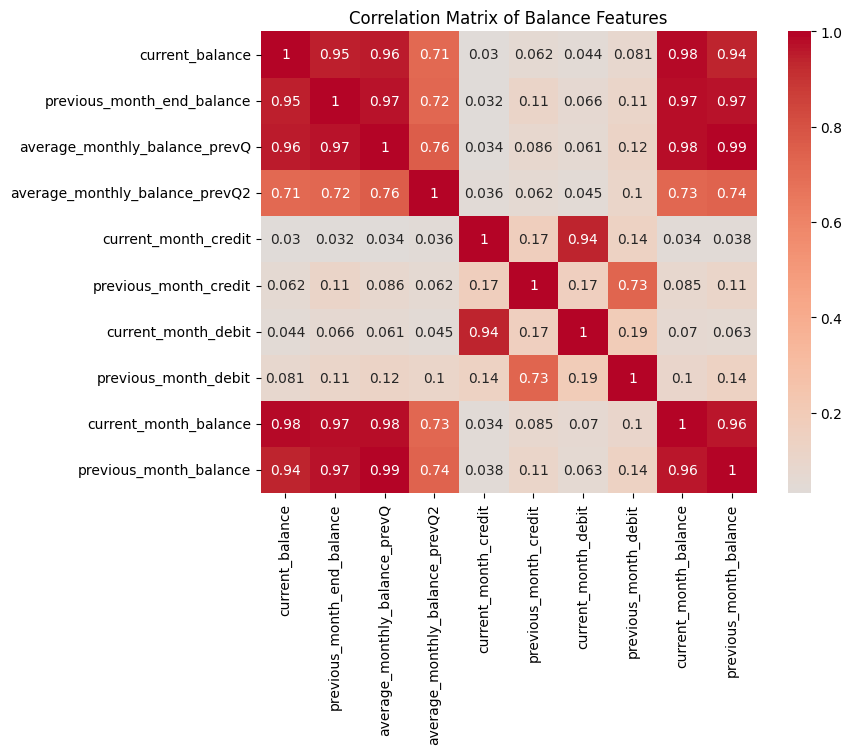

In [437]:
corr = df[balance_cols].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Balance Features")
plt.show()


**Insights:**
lot of balance columns have high correlation (> 0.95) so we don't need all of them in the analysis, for eg: *current_balance and current_month_balance* OR *previous_month_end_balance and previous_month_balance*

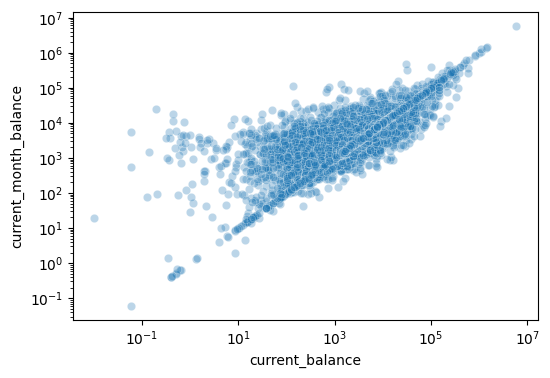

In [438]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='current_balance', y='current_month_balance', data=df, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.show()

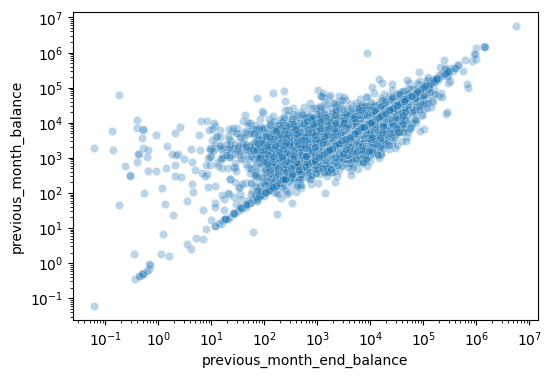

In [439]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='previous_month_end_balance', y='previous_month_balance', data=df, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [440]:
# keep only the balance columns which are not correlated

balance_cols_reduced = ['current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ']

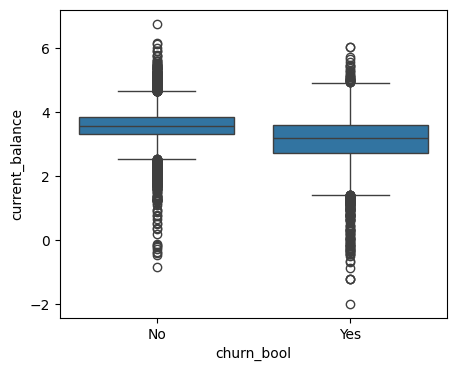

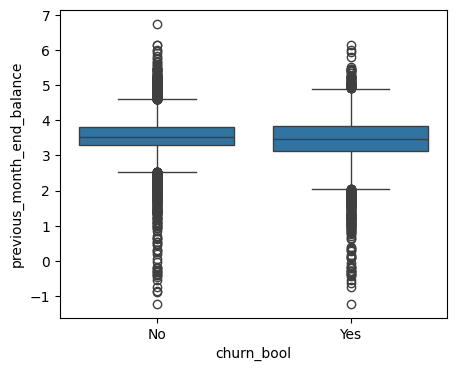

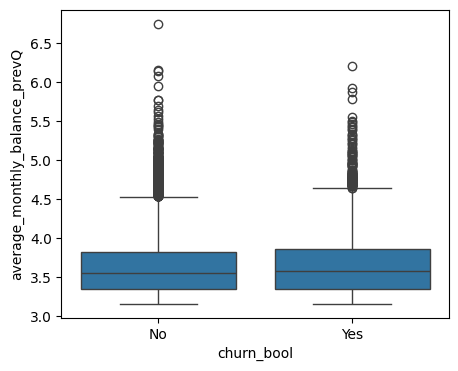

In [442]:
for col in balance_cols_reduced:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=df["churn_bool"], y=np.log10(df[col]))
    plt.show()

**Insights:**
1. current balance of churn is lower that non-churn, which means customers that churn often have low balances
2. other 2 features doesn't show any relationship

##### Churn Rate by current balance percentiles

In [443]:
df['current_balance'].quantile([.05, .25, .50, .75, .95, 1.0]).round(2)

0.05        389.25
0.25       1784.47
0.50       3281.26
0.75       6635.82
0.95      21723.40
1.00    5905904.03
Name: current_balance, dtype: float64

In [444]:
# create bins for current_balance in 5 percentile bins
df['current_balance_bin'] = pd.qcut(df['current_balance'], q=[0, .05, .25, .50, .75, .95, 1.0], labels=['≤5%', '5–25%', '25–50%', '50–75%', '75–95%', '>95%'], 
                            duplicates='drop')  # if some quantiles are equal

In [445]:
df[['current_balance', 'current_balance_bin']].sort_values('current_balance')

,current_balance,current_balance_bin
12608,-5503.96,≤5%
1375,-5213.02,≤5%
22546,-4570.80,≤5%
1976,-3786.47,≤5%
18657,-3244.36,≤5%
...,...,...
23211,1064423.50,>95%
19977,1076091.29,>95%
23247,1398486.42,>95%
27856,1435872.80,>95%


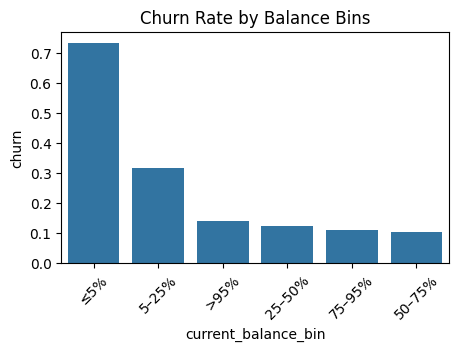

In [446]:
order = df.groupby('current_balance_bin')['churn'].mean().sort_values(ascending=False).index
plt.figure(figsize=(5,3))
sns.barplot(x="current_balance_bin", y="churn", data=df, order=order, errorbar=None)
plt.xticks(rotation=45) 
plt.title(f"Churn Rate by Balance Bins")
plt.show()

**Insights:**
Low current balance (< 5th ), mostly 0 or -ve balances have the highest churn rate, and higher balance (> 75th ) has lower churn rate, so we can say that churn is -negatively correlated to balance. Lets prove this using independent sample t-test

##### Independent sample t-test (C-Q) (churn vs current balance)

In [447]:
# create log columns for balance (churn vs not churn)

balance_churned = df.loc[df['churn']==1, 'current_balance'].to_numpy()
balance_not_churned = df.loc[df['churn']==0, 'current_balance'].to_numpy()

# Keep positives only, and apply log-transform to normalize the distribution
balance_churned_pos_log = np.log10(balance_churned[balance_churned > 0])
balance_not_churned_log = np.log10(balance_not_churned[balance_not_churned > 0])

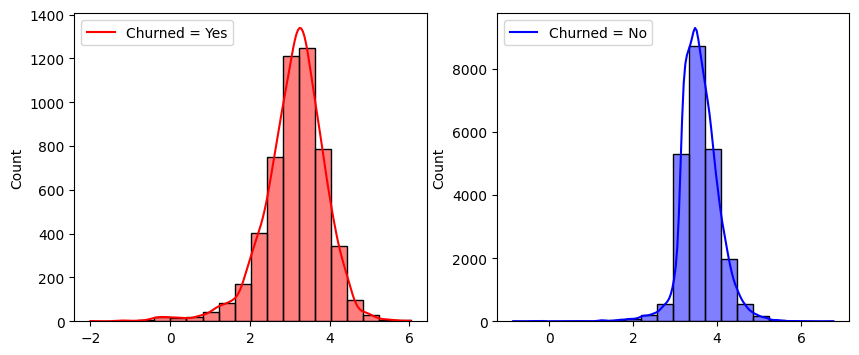

In [448]:
# validate if current_balance is normally distributed for Churn vs Not-churn

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(balance_churned_log, kde=True, bins=20, color='red', ax=axes[0])
sns.histplot(balance_not_churned_log, kde=True, bins=20, color='blue', ax=axes[1])
axes[0].legend(["Churned = Yes"])
axes[1].legend(["Churned = No"])
plt.show()

##### Hypothesis:
H0: "current balance has No relationship with churn"

H1: "current balance has a relationship with churn"

significance level: 0.05

test: independent sample two side T-test

In [449]:
from scipy.stats import ttest_ind

alpha = 0.05

t_test_object = ttest_ind(balance_churned_log, balance_not_churned_log, axis=0, equal_var=False)
t_stat = t_test_object.statistic
p_value = t_test_object.pvalue
dof = t_test_object.df
ci_low = t_test_object.confidence_interval(1-alpha)[0]
ci_high = t_test_object.confidence_interval(1-alpha)[1]

t_stat, p_value, t_test_object.confidence_interval(1-alpha)

print(f"The t-statistic is:     {t_stat:4f}")
print(f"The p-value is:         {p_value:4f}")
print(f"90% CI is:             [{ci_low:4f} to {ci_high:4f}]")

if p_value < alpha:
    print("Decision             : Reject the null hypothesis.")
else:
    print("Decision             : Fail to reject the null (no evidence of a difference).")


The t-statistic is:     -42.827334
The p-value is:         0.000000
90% CI is:             [-0.498851 to -0.455182]
Decision             : Reject the null hypothesis.


**Insights:**
with t-stat of −43.8 (two-sided), we reject Null Hypothesis with (alpha = 0.05) and state that "Current balance has a relationship with churn"

#### Feature Engineering

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   vintage                         28382 non-null  int64   
 1   age                             28382 non-null  int64   
 2   gender                          28382 non-null  category
 3   dependents                      28382 non-null  int64   
 4   occupation                      28382 non-null  category
 5   city                            28382 non-null  category
 6   customer_nw_category            28382 non-null  category
 7   branch_code                     28382 non-null  category
 8   current_balance                 28382 non-null  float64 
 9   previous_month_end_balance      28382 non-null  float64 
 10  average_monthly_balance_prevQ   28382 non-null  float64 
 11  average_monthly_balance_prevQ2  28382 non-null  float64 
 12  current_month_cred

##### Feature 1: Credit-to-Debit Ratio

In [451]:
df['total_debit'] = df['current_month_debit']   + df['previous_month_debit']
df['total_credit'] = df['current_month_credit'] + df['previous_month_credit']
df['debit_credit_ratio'] = df['total_debit']   / (df['total_credit'] + 1e-6) 

In [452]:
def scatter_plot_chart(col1, col2):

    fig, ax = plt.subplots(1, 1, figsize=(6,4))

    df_col1 = df[col1]
    df_col2 = df[col2]
    df_col1 = np.log10(df_col1[df_col1 > 0])
    df_col2 = np.log10(df_col2[df_col2 > 0])

    sns.scatterplot(x=df_col1, y=df_col2, ax=ax, alpha=0.3)
    ax.set_title(f"Scatterplot between {col1} and {col2}")
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)

    plt.tight_layout()
    plt.show()

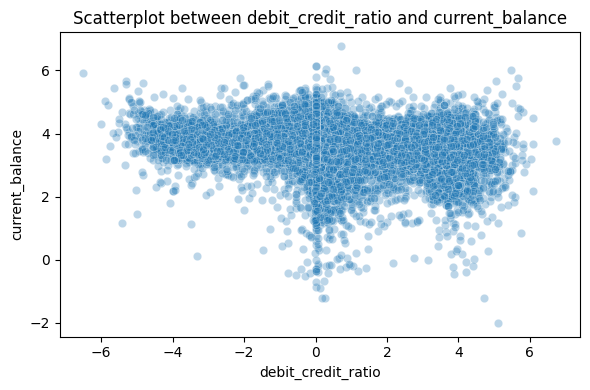

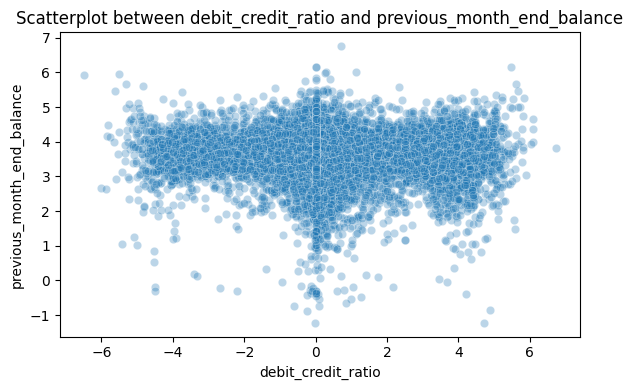

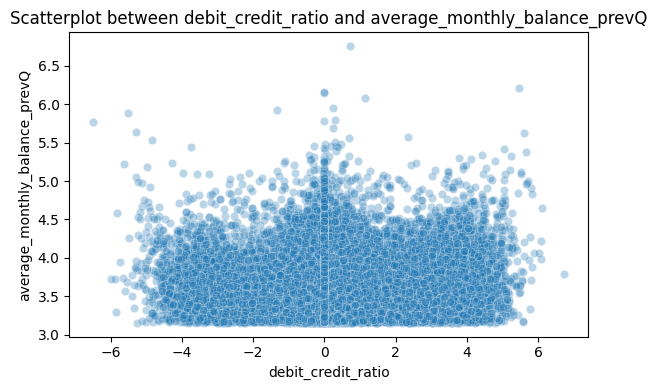

In [453]:
for col2 in balance_cols_reduced:
    scatter_plot_chart("debit_credit_ratio", col2)

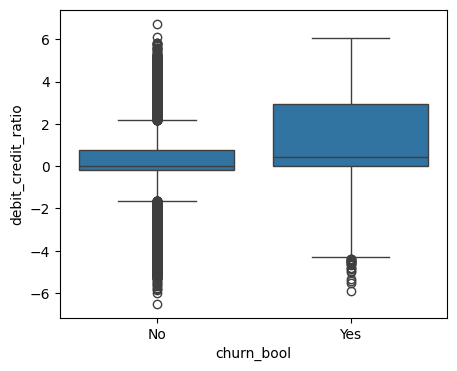

In [454]:
plt.figure(figsize=(5,4))
sns.boxplot(x=df["churn_bool"], y=np.log10(df['debit_credit_ratio']))
plt.show()

**Insights:**
Churned customers have a higher to debit to credit ratio (higher debit than credit) means lower or -ve balance

##### Feature 2: Days since last transaction (Recency)

In [455]:
# convert last_transaction to datetime
df['last_transaction'] = pd.to_datetime(df['last_transaction'])

# pick a reference date (usually max date in the data)
reference_date = df['last_transaction'].max()
# reference_date = pd.to_datetime(date.today())

# calculate recency in days
df['days_since_last_txn'] = (reference_date - df['last_transaction']).dt.days

In [456]:
df['days_since_last_txn'].describe()

count    25159.000000
mean        69.997814
std         86.341098
min          0.000000
25%         11.000000
50%         30.000000
75%         95.000000
max        365.000000
Name: days_since_last_txn, dtype: float64

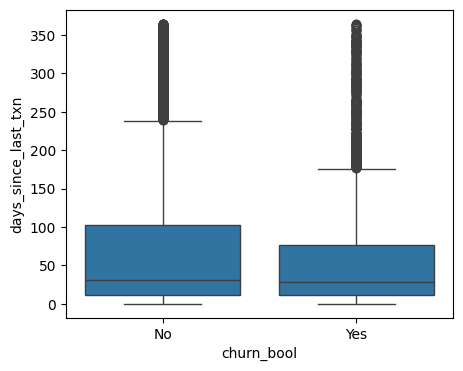

In [457]:
plt.figure(figsize=(5,4))
sns.boxplot(x=df["churn_bool"], y=df['days_since_last_txn'])
plt.show()

In [458]:
# create bins for days_since_last_txn
df['recency_bin'] = pd.qcut(df['days_since_last_txn'], q=[0, .25, .50, .75, 1.0], labels=['≤25%', '25–50%', '50–75%', '>75%'],
                            duplicates='drop')

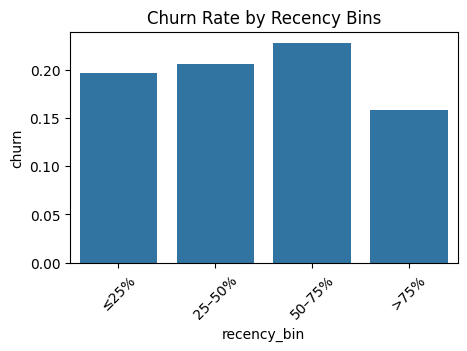

In [459]:
order = df.groupby('recency_bin')['churn'].mean().index
plt.figure(figsize=(5,3))
sns.barplot(x="recency_bin", y="churn", data=df, order=order, errorbar=None)
plt.xticks(rotation=45) 
plt.title(f"Churn Rate by Recency Bins")
plt.show()

**Insights:** Recency might not have relationship with churn since >75th per (more time since last transaction) has the lowest churn